In [19]:
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size=1000      #定义词汇表大小为1000，Tokenizer将只考虑每个样本中出现频率最高的前1000个词
embedding_dim=16     #嵌入维度为16
max_length= 120      #定义序列的最大长度为120，超过这个长度的序列将被截断
trunc_length='post'  #截断类型为'post'
padding_type='post'  #填充类型为'post'
oov_tok='<oov>'      #词汇表外单词占位符为'<oov>'
training_portion=.8  #训练集占80%
sentences=[]         #存储所有句子
labels=[]            #存储所有标签
#定义停用词列表，预处理时移除它们
stopwords=[  "a  ",   "about  ",   "above  ",   "after  ",   "again  ",   "against  ",   "all  ",   "am  ",   "an  ",   "and  ",   "any  ",   "are  ",   "as  ",   "at  ",   "be  ",   "because  ",   "been  ",   "before  ",   "being  ",   "below  ",   "between  ",   "both  ",   "but  ",   "by  ",   "could  ",   "did  ",   "do  ",   "does  ",   "doing  ",   "down  ",   "during  ",   "each  ",   "few  ",   "for  ",   "from  ",   "further  ",   "had  ",   "has  ",   "have  ",   "having  ",   "he  ",   "he'd  ",   "he'll  ",   "he's  ",   "her  ",   "here  ",   "here's  ",   "hers  ",   "herself  ",   "him  ",   "himself  ",   "his  ",   "how  ",   "how's  ",   "i  ",   "i'd  ",   "i'll  ",   "i'm  ",   "i've  ",   "if  ",   "in  ",   "into  ",   "is  ",   "it  ",   "it's  ",   "its  ",   "itself  ",   "let's  ",   "me  ",   "more  ",   "most  ",   "my  ",   "myself  ",   "nor  ",   "of  ",   "on  ",   "once  ",   "only  ",   "or  ",   "other  ",   "ought  ",   "our  ",   "ours  ",   "ourselves  ",   "out  ",   "over  ",   "own  ",   "same  ",   "she  ",   "she'd  ",   "she'll  ",   "she's  ",   "should  ",   "so  ",   "some  ",   "such  ",   "than  ",   "that  ",   "that's  ",   "the  ",   "their  ",   "theirs  ",   "them  ",   "themselves  ",   "then  ",   "there  ",   "there's  ",   "these  ",   "they  ",   "they'd  ",   "they'll  ",   "they're  ",   "they've  ",   "this  ",   "those  ",   "through  ",   "to  ",   "too  ",   "under  ",   "until  ",   "up  ",   "very  ",   "was  ",   "we  ",   "we'd  ",   "we'll  ",   "we're  ",   "we've  ",   "were  ",   "what  ",   "what's  ",   "when  ",   "when's  ",   "where  ",   "where's  ",   "which  ",   "while  ",   "who  ",   "who's  ",   "whom  ",   "why  ",   "why's  ",   "with  ",   "would  ",   "you  ",   "you'd  ",   "you'll  ",   "you're  ",   "you've  ",   "your  ",   "yours  ",   "yourself  ",   "yourselves  " ]

In [44]:
#读入清洗后的文本及对应标签
with open('dataset_BBC/bbc-text.csv','r') as csvfile:
  reader=csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence=row[1]
    for word in stopwords:
      token=''+word+''
      sentence=sentence.replace(token,'')
    sentences.append(sentence)
print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-i

In [49]:
#划分训练集和验证集
train_size=int(len(sentences)*training_portion)
train_sentences=sentences[:train_size]
train_labels=labels[:train_size]
print(train_size)
print(len(train_sentences))
print(len(train_labels))

validation_sentences=sentences[train_size:]
validation_labels=labels[train_size:]
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [ ]:
#使用训练集创建tokenizer实例
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index=tokenizer.word_index    #获取tokenizer的词汇表索引
train_sequences=tokenizer.texts_to_sequences(train_sentences)  #将训练集句子转换成整数序列
train_padded=pad_sequences(train_sequences,padding=padding_type,maxlen=max_length) #将训练集序列填充到相同长度
print(len(train_sequences[0]))
print(len(train_padded[0]))
print(len(train_sequences[1]))
print(len(train_padded[1]))
print(len(train_sequences[10]))
print(len(train_padded[10]))

#验证集同样处理
validation_sequences=tokenizer.texts_to_sequences(validation_sentences)
validation_padded=pad_sequences(validation_sequences,padding=padding_type,maxlen=max_length)
print(len(validation_sequences))
print(validation_padded.shape)



742
120
295
120
308
120
445
(445, 120)


In [51]:
#创建label的tokenizer实例
label_tokenizer=Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq=np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq=np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq.shape)


[4]
(1780, 1)
[5]
(445, 1)


In [ ]:
#定义模型
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 6)                 150       
                                                                 
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#模型训练
num_epochs=30
history=model.fit(train_padded,training_label_seq, epochs=num_epochs,validation_data=(validation_padded,validation_label_seq),verbose=2)

Epoch 1/30
56/56 - 1s - loss: 1.7579 - accuracy: 0.2348 - val_loss: 1.7182 - val_accuracy: 0.2270 - 756ms/epoch - 14ms/step
Epoch 2/30
56/56 - 0s - loss: 1.6768 - accuracy: 0.2478 - val_loss: 1.6354 - val_accuracy: 0.2809 - 92ms/epoch - 2ms/step
Epoch 3/30
56/56 - 0s - loss: 1.5969 - accuracy: 0.3567 - val_loss: 1.5643 - val_accuracy: 0.4449 - 90ms/epoch - 2ms/step
Epoch 4/30
56/56 - 0s - loss: 1.5138 - accuracy: 0.4489 - val_loss: 1.4793 - val_accuracy: 0.4652 - 95ms/epoch - 2ms/step
Epoch 5/30
56/56 - 0s - loss: 1.3998 - accuracy: 0.4826 - val_loss: 1.3594 - val_accuracy: 0.4876 - 90ms/epoch - 2ms/step
Epoch 6/30
56/56 - 0s - loss: 1.2496 - accuracy: 0.5331 - val_loss: 1.2210 - val_accuracy: 0.5798 - 87ms/epoch - 2ms/step
Epoch 7/30
56/56 - 0s - loss: 1.1021 - accuracy: 0.6124 - val_loss: 1.0982 - val_accuracy: 0.6360 - 88ms/epoch - 2ms/step
Epoch 8/30
56/56 - 0s - loss: 0.9773 - accuracy: 0.6725 - val_loss: 0.9999 - val_accuracy: 0.6742 - 86ms/epoch - 2ms/step
Epoch 9/30
56/56 - 0s 

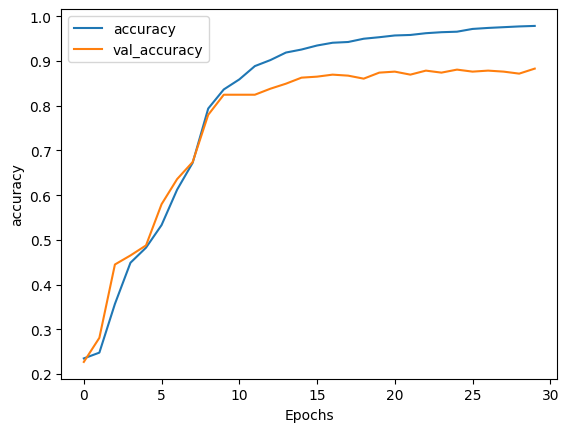

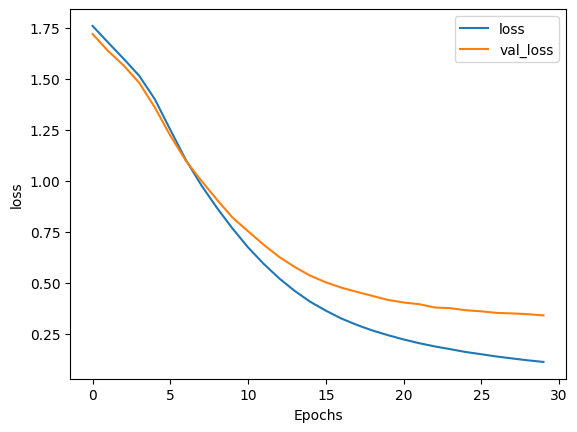

In [ ]:
#可视化acc、loss
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')